In [2]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from category_encoders import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
df =pd.read_csv("Cancer_Data.csv")
df.shape

(569, 33)

In [4]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df.drop(columns = "Unnamed: 32", inplace=True)
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

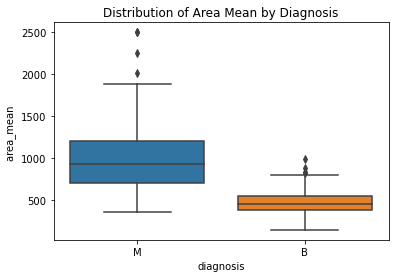

In [6]:
# Create boxplot to show the Distribution of Area Mean by Diagnosis
sns.boxplot(x="diagnosis", y="area_mean", data= df)
# Label axes
plt.xlabel("diagnosis")
plt.ylabel("area_mean ")
plt.title("Distribution of Area Mean by Diagnosis");

In [7]:
# convert diagnosis to B = 0, and M= 1
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})
df["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [8]:
target = "diagnosis"
X = df.drop(columns=target)
y = df[target]

In [9]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (455, 31)
X_test shape: (114, 31)
y_train shape: (455,)
y_test shape: (114,)


In [10]:
X_train, X_val, y_train, y_val =train_test_split(X_train,y_train, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (364, 31)
X_val shape: (91, 31)
y_train shape: (364,)
y_val shape: (91,)


In [11]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.63


# Iterate

In [12]:
#Using ordinal encoder
model = make_pipeline(
    OrdinalEncoder(), DecisionTreeClassifier(random_state=42) 
)

#Fit model to training data
model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

# Evalute Model

In [13]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_val = model.score(X_val, y_val)

print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))

Training Accuracy: 1.0
Validation Accuracy: 0.92


# Tree Depth

In [14]:
tree_depth = model.named_steps["decisiontreeclassifier"].get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 5


In [15]:
depth_hyperparams = range(1, 50, 2)
depth_hyperparams

# Check your work
assert (
    len(list(depth_hyperparams)) == 25
), f"`depth_hyperparams` should contain 25 items, not {len(list(depth_hyperparams))}."
assert (
    list(depth_hyperparams)[0] == 1
), f"`depth_hyperparams` should begin at 1, not {list(depth_hyperparams)[0]}."
assert (
    list(depth_hyperparams)[-1] == 49
), f"`depth_hyperparams` should end at 49, not {list(depth_hyperparams)[-1]}."

# Hyperparameter Turning for a better performance

In [16]:
# Create empty lists for training and validation accuracy scores
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    test_model = make_pipeline(
    OrdinalEncoder(), DecisionTreeClassifier(max_depth=d, random_state=42)
)
    # Fit model to training data
    test_model.fit(X_train, y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X_train,y_train))
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(test_model.score(X_val,y_val))

print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])

Training Accuracy Scores: [0.9285714285714286, 0.9752747252747253, 1.0]
Validation Accuracy Scores: [0.8901098901098901, 0.9340659340659341, 0.9230769230769231]


# Validation Curve

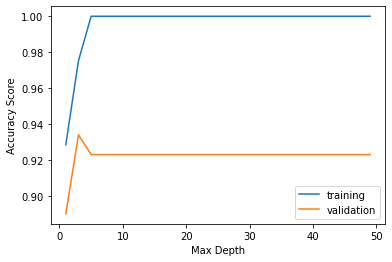

In [17]:
plt.plot(depth_hyperparams, training_acc, label="training")
plt.plot(depth_hyperparams, validation_acc, label="validation")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.legend();

# Model Evaluation

In [18]:
test_acc = model.score(X_test, y_test)
print("Test Accuracy:", round(test_acc, 2))

Test Accuracy: 0.94


# Plot Tree Model

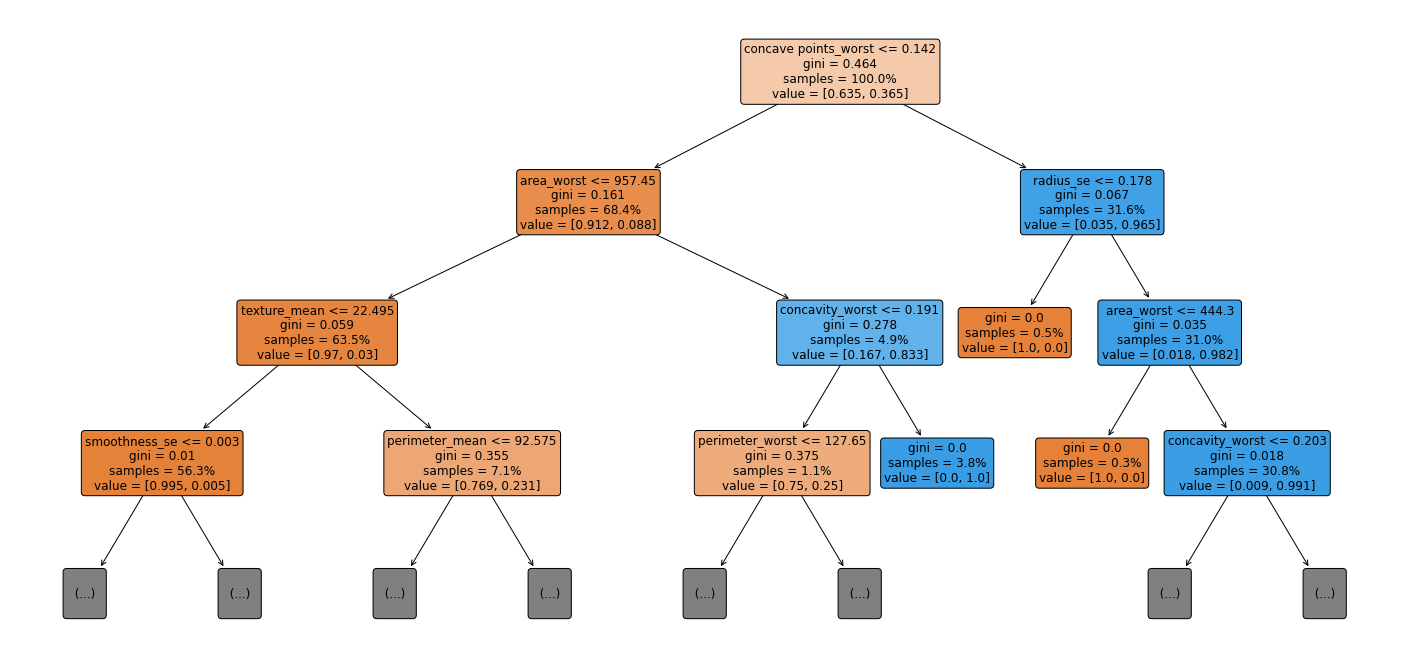

In [19]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree= model.named_steps["decisiontreeclassifier"],
    feature_names=X_train.columns.to_list(),
    filled=True, 
    rounded=True,  
    proportion=True,  
    max_depth=3,   
    fontsize=12,  
    ax=ax, 
);

In [20]:
features = X_train.columns
importances = model.named_steps["decisiontreeclassifier"].feature_importances_

print("Features:", features[:3])
print("Importances:", importances[:3])

Features: Index(['id', 'radius_mean', 'texture_mean'], dtype='object')
Importances: [0.         0.         0.01394927]


In [21]:
feat_imp = pd.Series(importances, index=features)
feat_imp.head()

id                0.000000
radius_mean       0.000000
texture_mean      0.013949
perimeter_mean    0.026532
area_mean         0.000000
dtype: float64

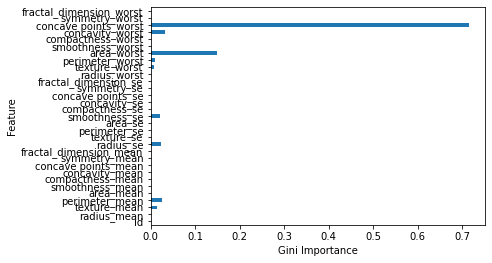

In [22]:
# Create horizontal bar chart
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature");